In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DF=pd.read_csv('/content/drive/MyDrive/heart.csv')
DF.head()

Mounted at /content/drive


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data first look

In [ ]:
nRow, nCol = DF.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1025 rows and 14 columns


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
DF.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
DF.describe().round(2).style.background_gradient()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.430000,0.700000,0.940000,131.610000,246.000000,0.150000,0.530000,149.110000,0.340000,1.070000,1.390000,0.750000,2.320000,0.510000
std,9.070000,0.460000,1.030000,17.520000,51.590000,0.360000,0.530000,23.010000,0.470000,1.180000,0.620000,1.030000,0.620000,0.500000
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

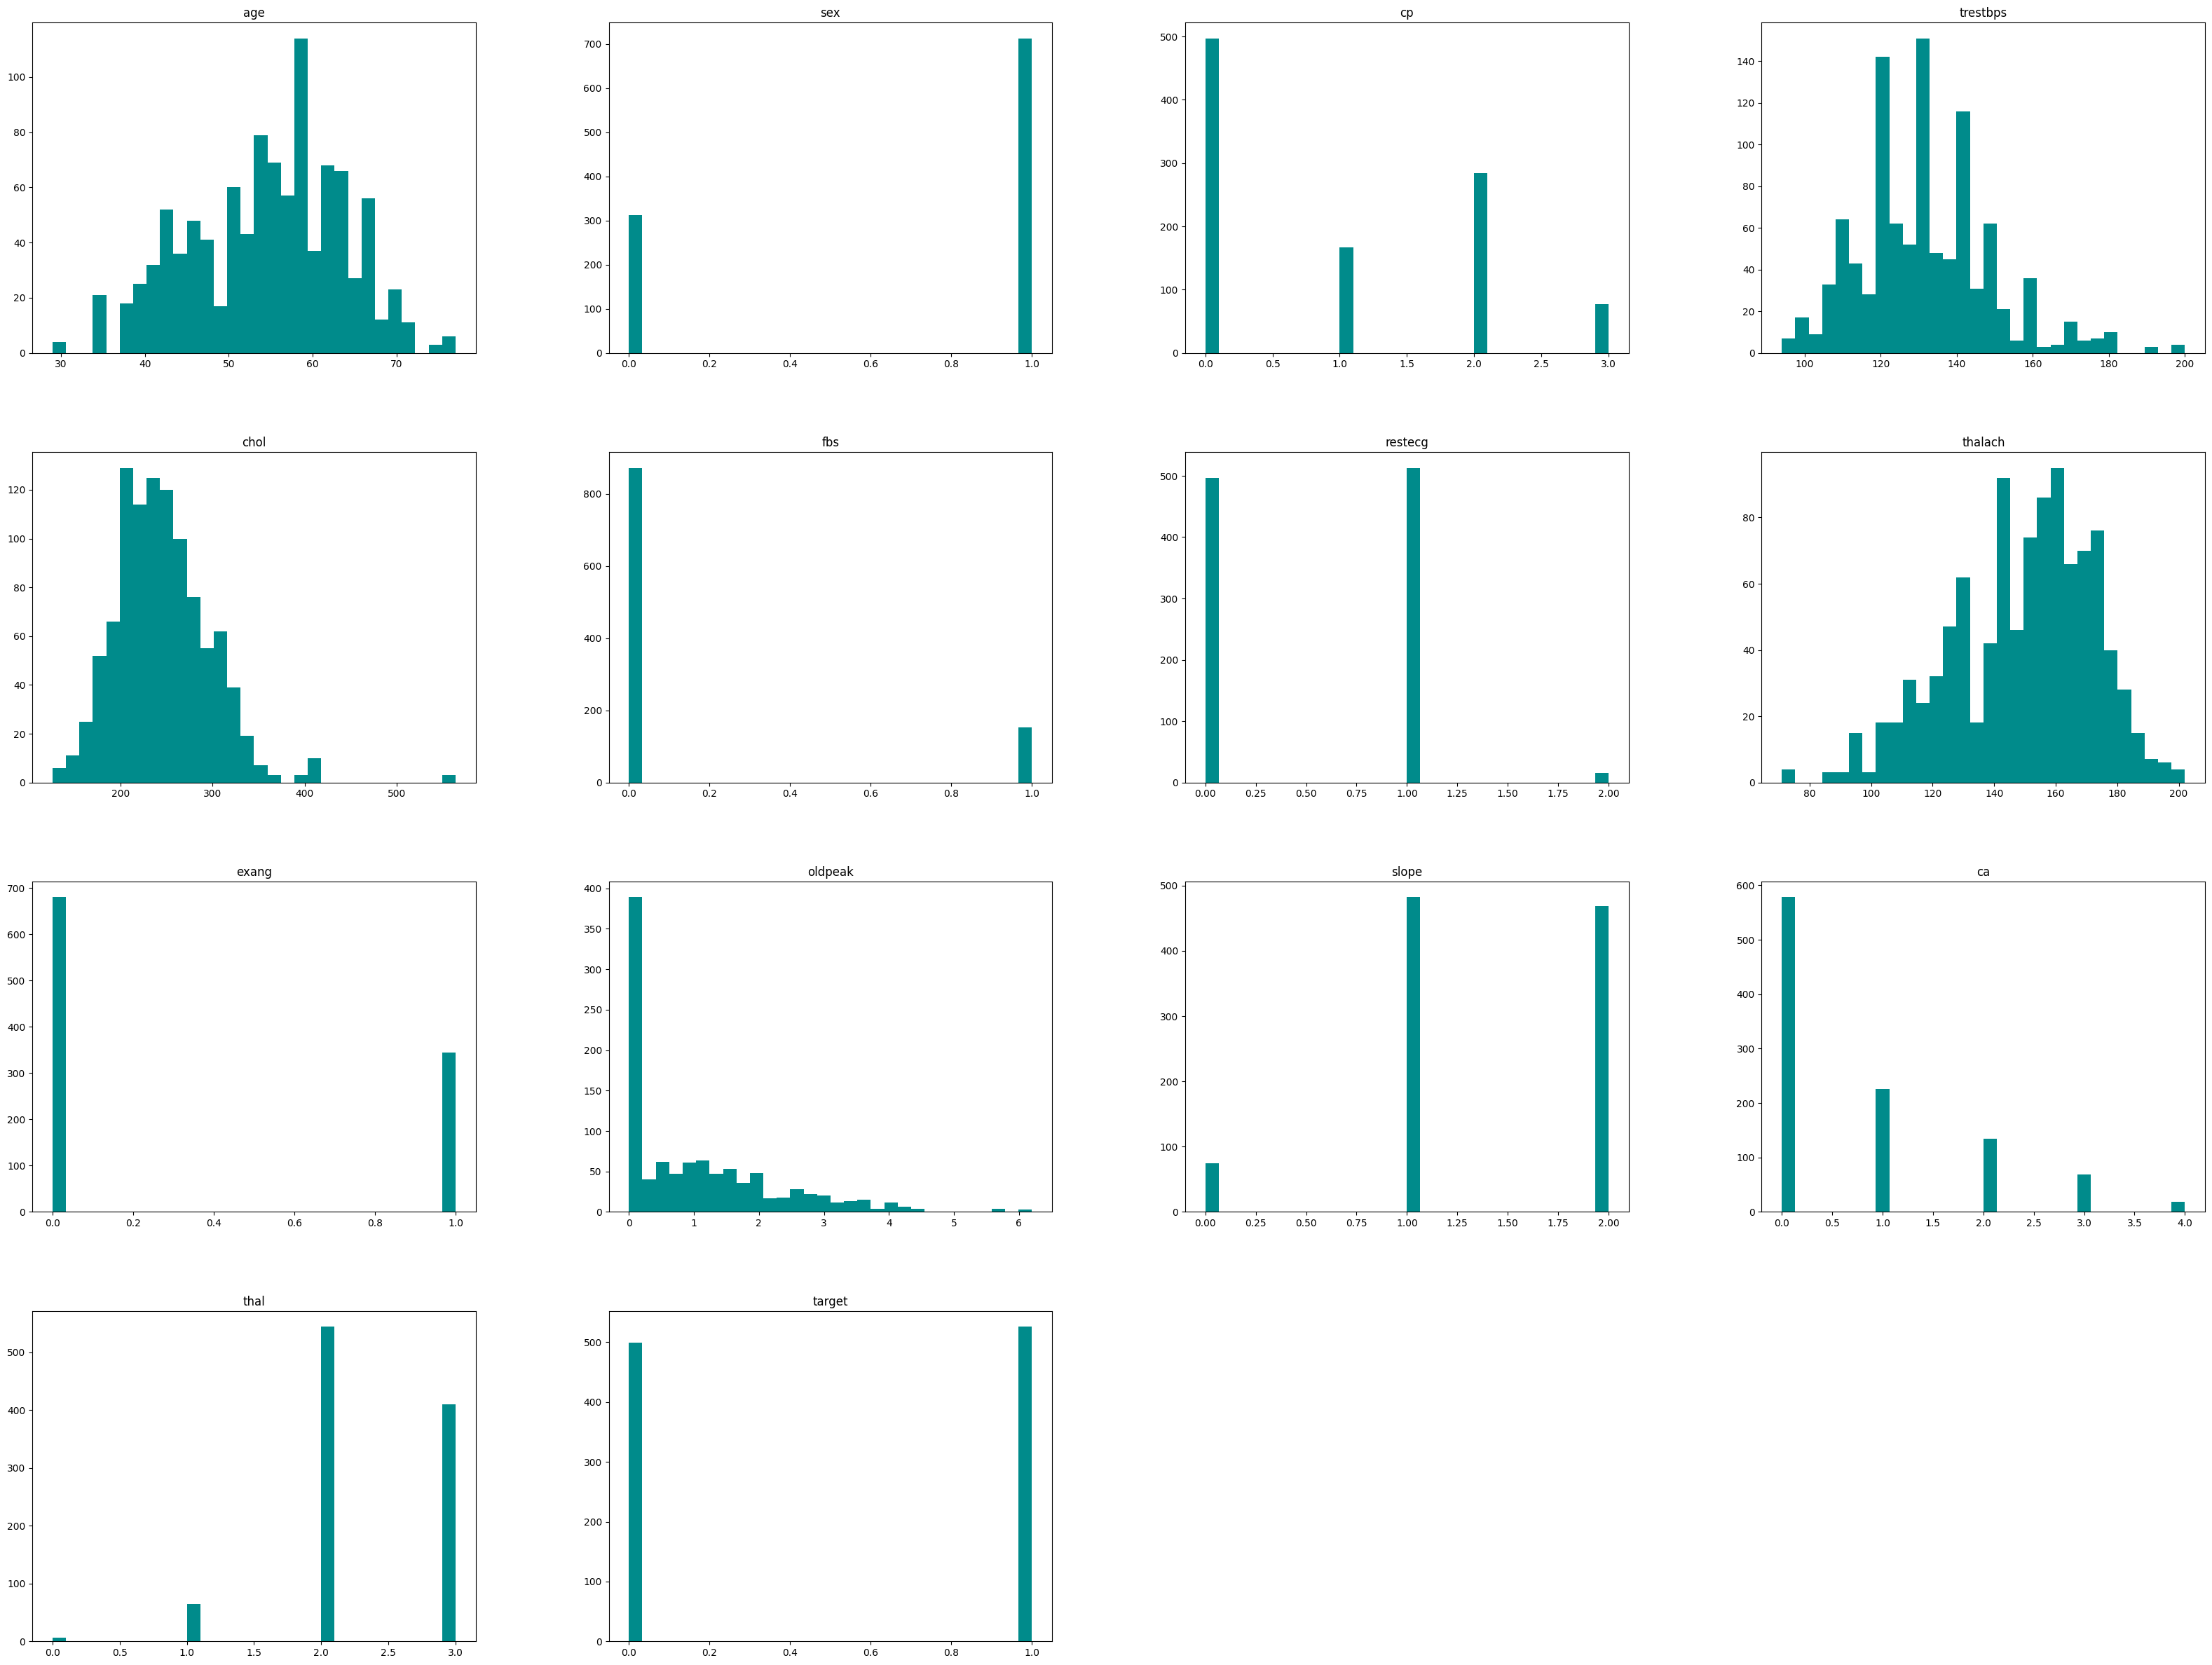

In [ ]:
DF.hist(bins = 30 , layout = (4,4), figsize = (40,30)  ,column = DF.columns[0:], color= "DarkCyan", grid = False)
plt.show()

In [ ]:
DF_corr= DF.corr()

<Axes: >

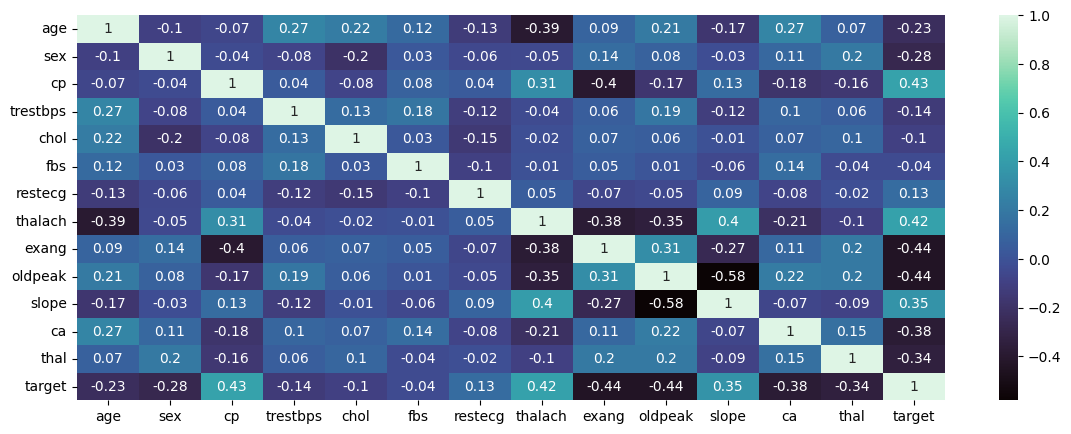

In [ ]:
plt.figure(figsize = (14,5))
sns.heatmap(round(DF_corr,2),annot=True,cmap = 'mako')

In [ ]:
# Fixing the Data Types
Mis_features=['thal','ca','slope','exang','restecg','fbs','cp','sex']
DF[Mis_features] = DF[Mis_features].astype(object)

In [ ]:
DF.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [ ]:
#Split numerical-categorical Features
numerical_col = DF.select_dtypes(exclude=np.object_)
categorical_col = DF.select_dtypes(exclude=np.number)

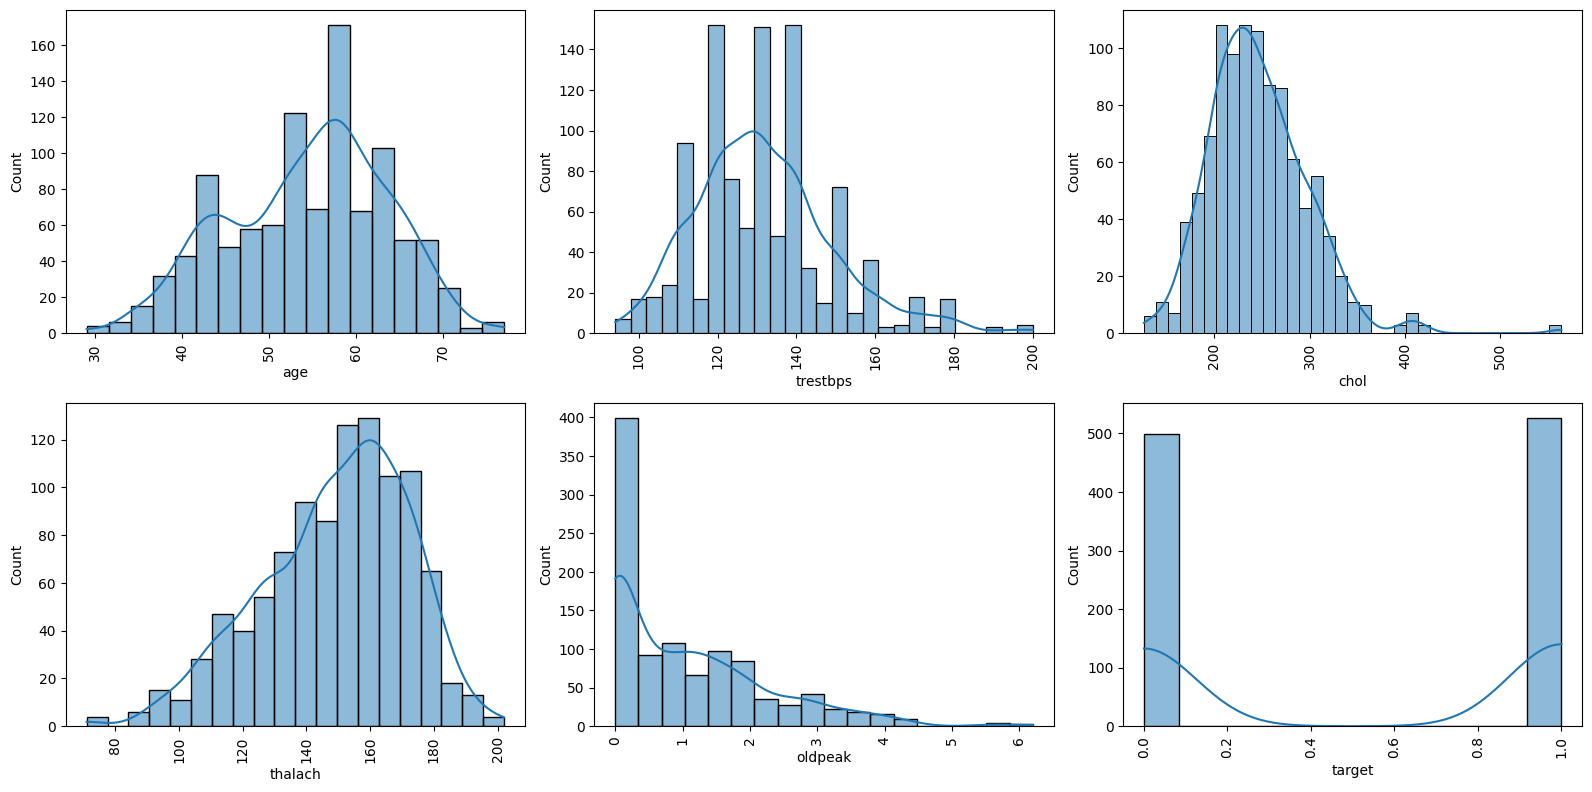

In [ ]:
plt.figure(figsize=(16,8))
for index,column in enumerate(numerical_col):
    plt.subplot(2,3,index+1)
    sns.histplot(data=numerical_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

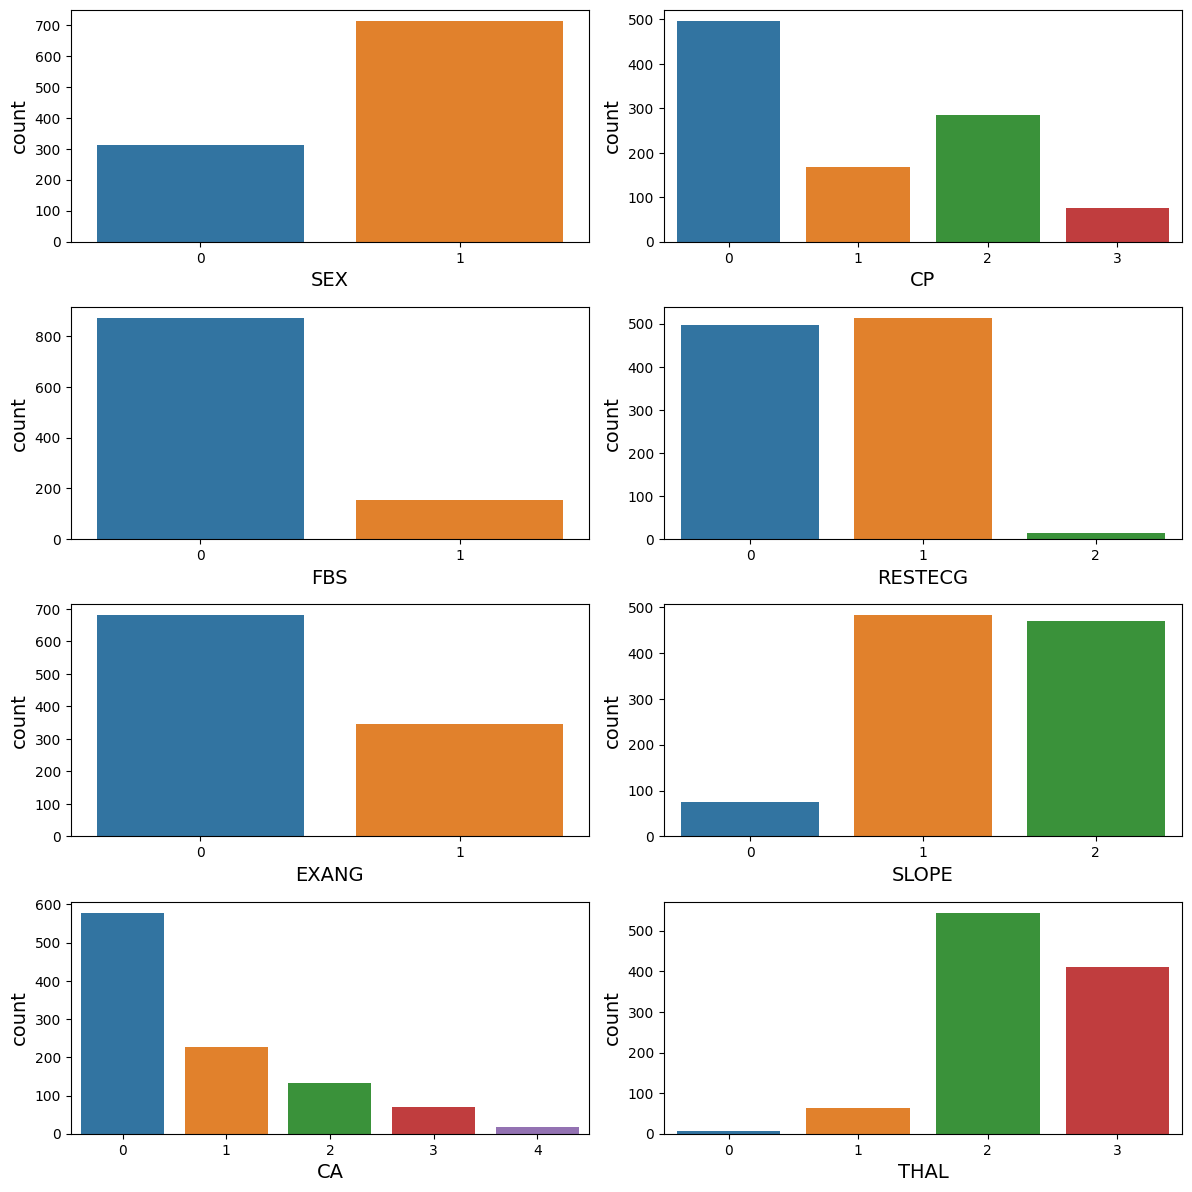

In [ ]:
plt.figure(figsize=(12,12))
for index,column in enumerate(categorical_col):
    plt.subplot(4,2,index+1)
    sns.countplot(data=categorical_col,x=column)
    plt.xlabel(column.upper(),fontsize=14)
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad = 1.0)
plt.show()

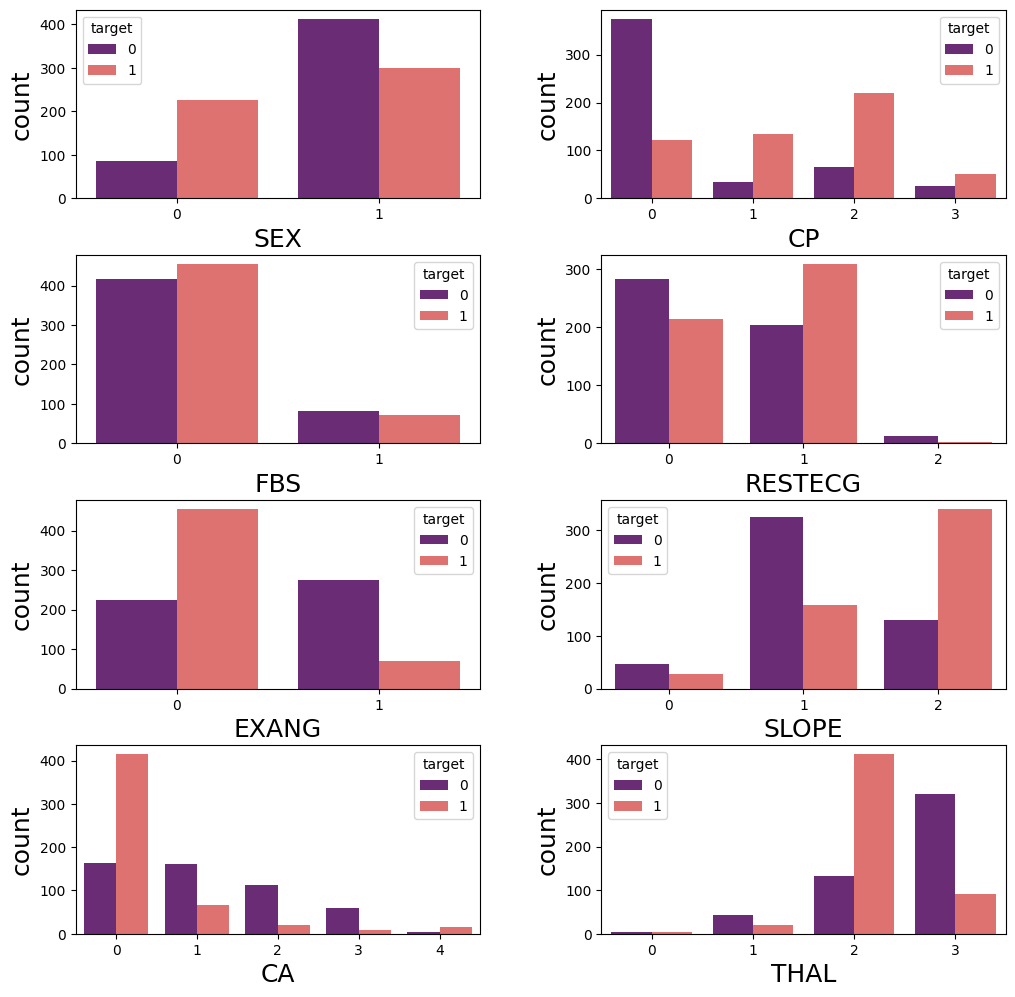

In [ ]:
Cat_col=categorical_col.columns
fig = plt.figure(figsize=(12,12))
for index in range(len(Cat_col)):
    if Cat_col[index] != 'target':
        plt.subplot(4,2,index + 1)
        sns.countplot(data = categorical_col,x=Cat_col[index],hue=DF['target'], palette ="magma")
        plt.xlabel(Cat_col[index].upper(),fontsize=18)
        plt.ylabel("count", fontsize=18)
        plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

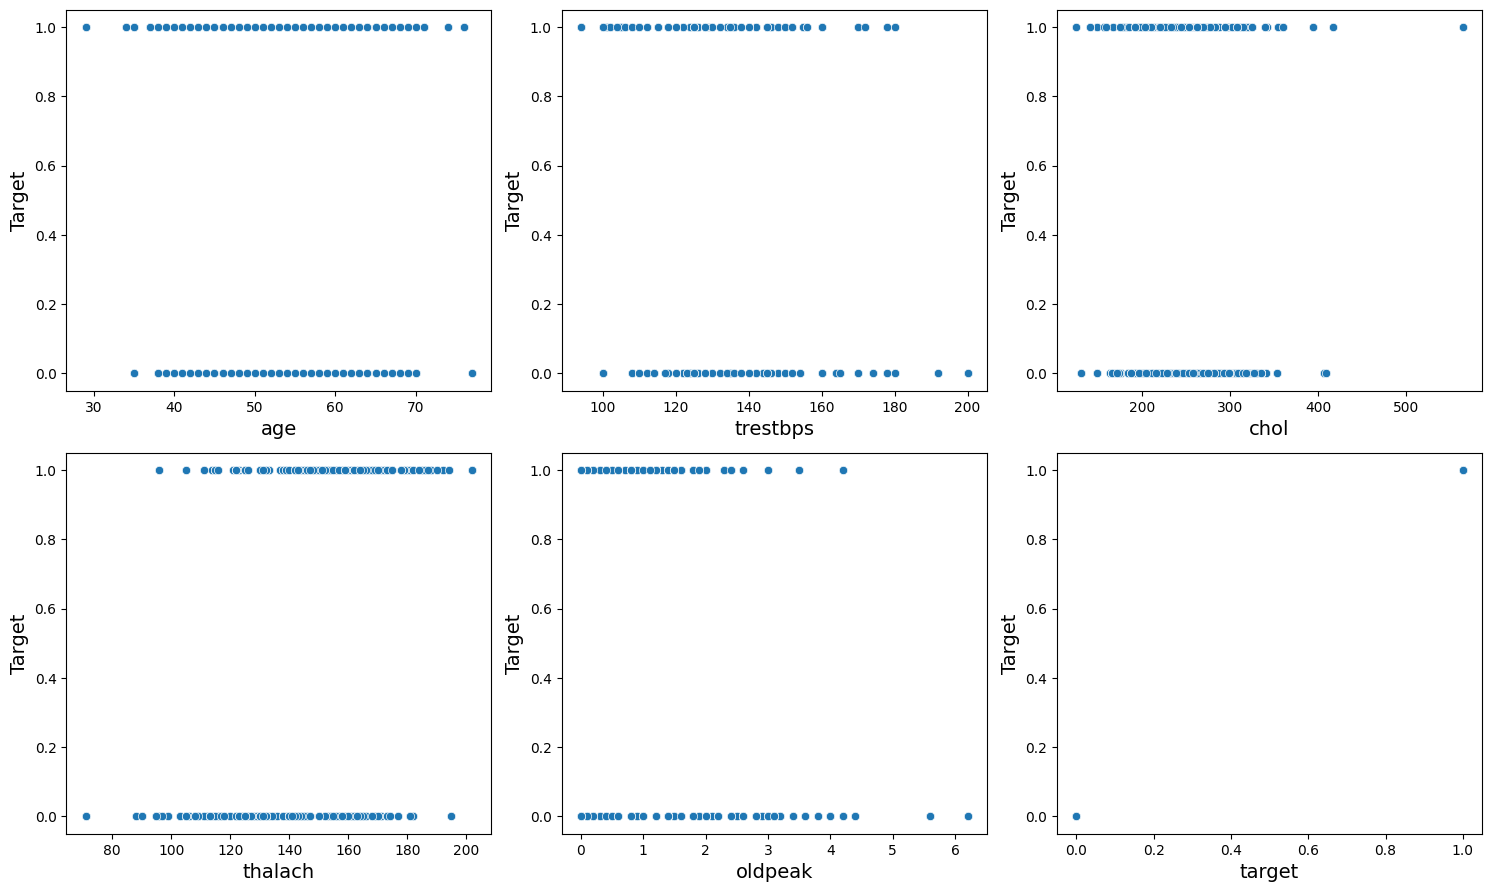

In [ ]:
fig = plt.figure(figsize=(15,9))
for index in range(len(numerical_col.columns)):
    plt.subplot(2,3,index + 1)
    sns.scatterplot(x = numerical_col.iloc[:,index],y=DF.target,data = numerical_col)
    plt.xlabel( numerical_col.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad = 1.0)

## Data Pre-Processing

### Check for missing or duplicates Values

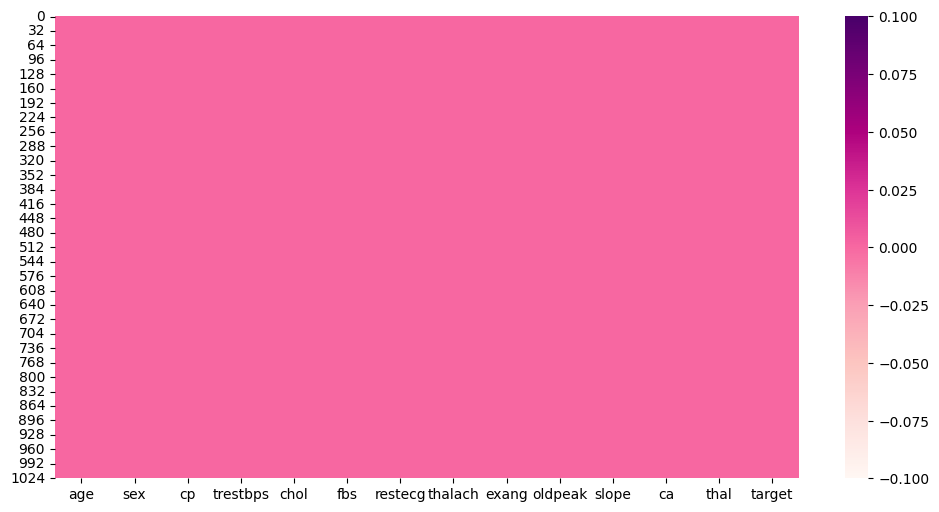

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(DF.isnull(),cmap='RdPu')
plt.show()

### Check for data imbalance

<Axes: xlabel='target', ylabel='count'>

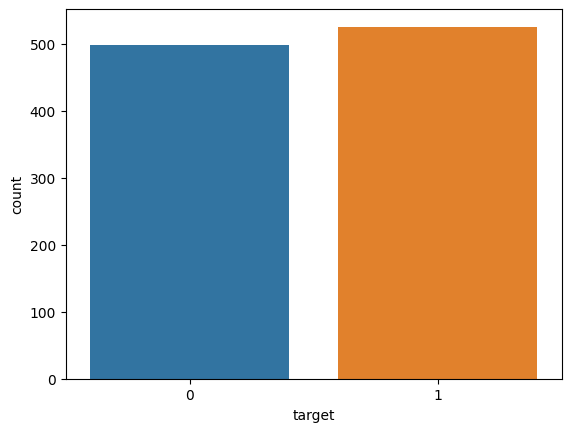

In [ ]:
sns.countplot(data=DF,x='target')

## Encoding

In [ ]:
Dum_DF=pd.get_dummies(DF,columns=['thal','ca','slope','exang','restecg','fbs','cp','sex'],drop_first=True)

In [ ]:
Dum_DF.head()

,age,trestbps,chol,thalach,oldpeak,target,thal_1,thal_2,thal_3,ca_1,...,slope_1,slope_2,exang_1,restecg_1,restecg_2,fbs_1,cp_1,cp_2,cp_3,sex_1
0,52,125,212,168,1.0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,70,145,174,125,2.6,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0


## Split The Data

In [ ]:
X = Dum_DF.drop(['target'], axis=1)
y = Dum_DF['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

## Scale The Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Modeling

### ANN using sklearn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV


hyper_parameters = {'batch_size':['auto',100], 'max_iter':[200,500],'hidden_layer_sizes':[5,(5,5,5)],
                    'learning_rate_init': [0.05,0.01,0.001,0.005]}


gs  =GridSearchCV(MLPClassifier(),hyper_parameters,scoring='roc_auc',n_jobs=-1
                  ,return_train_score=False,verbose=0,cv=5)
clf =gs.fit(x_train, y_train)
print('The best combination is:')
print(clf.best_params_)

print('The best Accuracy is:')
print(clf.best_score_)

The best combination is:
{'batch_size': 'auto', 'hidden_layer_sizes': 5, 'learning_rate_init': 0.05, 'max_iter': 500}
The best Accuracy is:
0.9846205634152396


In [ ]:
Final_Model=clf.best_estimator_
y_predicted =Final_Model.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

,Y_test,Y_predicted
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0
590,1,1
905,0,0
737,0,0


## Sk-learn Model Evaluation

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay ,classification_report

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       102
           1       0.87      1.00      0.93       103

    accuracy                           0.92       205
   macro avg       0.93      0.92      0.92       205
weighted avg       0.93      0.92      0.92       205



In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,accuracy_score,recall_score

In [ ]:
print(f'\t\tMLP Model has A:- \n\nAccuracy: {accuracy_score(y_test,y_predicted).round(4)}\t\trecall_Score: {recall_score(y_test,y_predicted).round(4)}\nPrecision_score: {precision_score(y_test,y_predicted).round(4)}\t\tF1-score equals: {f1_score(y_test,y_predicted).round(4)}')

		MLP Model has A:- 

Accuracy: 0.922		recall_Score: 1.0
Precision_score: 0.8655		F1-score equals: 0.9279


### ANN using tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, input_dim=22, activation= "relu"))#hidden layer with 300 neurons with relu activation15
model.add(keras.layers.Dense(75, activation = "relu")) #hidden layer with 100 neurons with relu activation
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1150      
                                                                 
 dense_1 (Dense)             (None, 75)                3825      
                                                                 
 dense_2 (Dense)             (None, 1)                 76        
                                                                 
Total params: 5,051
Trainable params: 5,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer,
             loss = "binary_crossentropy",
             metrics= ["accuracy"])

In [ ]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=20,
          validation_data=(x_test, y_test), verbose=1
          )

Epoch 1/20
26/26 [==============================] - 2s 34ms/step - loss: 0.5278 - accuracy: 0.7549 - val_loss: 0.4330 - val_accuracy: 0.8390
Epoch 2/20
26/26 [==============================] - 0s 8ms/step - loss: 0.3424 - accuracy: 0.8598 - val_loss: 0.3793 - val_accuracy: 0.8439
Epoch 3/20
26/26 [==============================] - 0s 6ms/step - loss: 0.2879 - accuracy: 0.8829 - val_loss: 0.3576 - val_accuracy: 0.8488
Epoch 4/20
26/26 [==============================] - 0s 6ms/step - loss: 0.2602 - accuracy: 0.8976 - val_loss: 0.3407 - val_accuracy: 0.8390
Epoch 5/20
26/26 [==============================] - 0s 7ms/step - loss: 0.2380 - accuracy: 0.9037 - val_loss: 0.3274 - val_accuracy: 0.8537
Epoch 6/20
26/26 [==============================] - 0s 5ms/step - loss: 0.2185 - accuracy: 0.9220 - val_loss: 0.3170 - val_accuracy: 0.8439
Epoch 7/20
26/26 [==============================] - 0s 7ms/step - loss: 0.2032 - accuracy: 0.9244 - val_loss: 0.2932 - val_accuracy: 0.8683
Epoch 8/20
26/26 [=

In [ ]:
model_loss=pd.DataFrame(model.history.history)

## Keras Model Evaluation

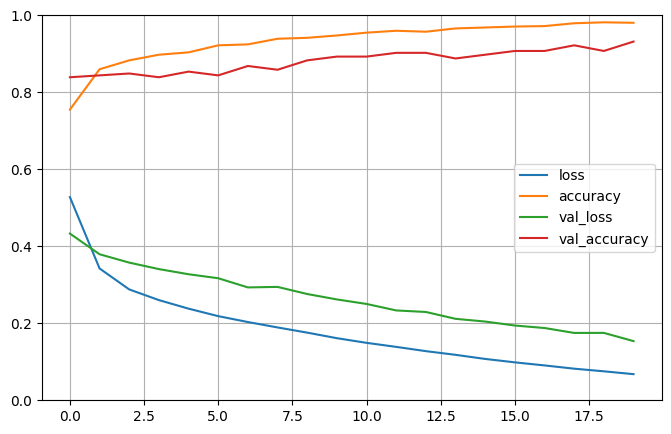

In [ ]:
model_loss.plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
p=model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
p = (p > 0.5) 
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       102
           1       0.91      0.96      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



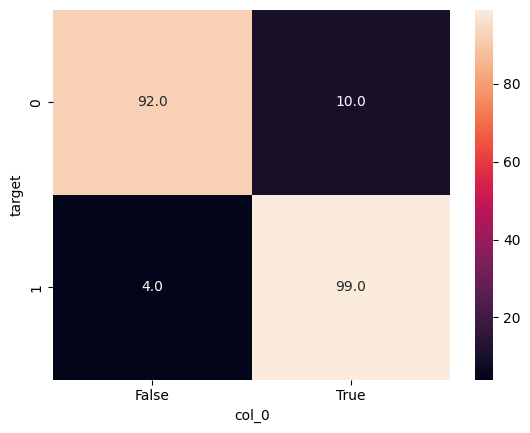

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_predict=np.reshape(p,-1)
confusion_matrix = pd.crosstab(y_test,y_predict)
confusion_matrix
sn.heatmap(confusion_matrix, annot=True, fmt=".1f")
plt.show()

In [ ]:
Ann_acc = model.evaluate(x_test, y_test)
Ann_acc = Ann_acc[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.1537 - accuracy: 0.9317


### Extracting Features from last Layer

In [ ]:
from tensorflow.keras.models import Model
model_feat = Model(inputs=model.input,outputs=model.get_layer('dense_2').output)

feat_train = model_feat.predict(x_train)
print(feat_train.shape)

feat_val = model_feat.predict(x_test)
print(feat_val.shape)

feat_test = model_feat.predict(x_test)
print(feat_test.shape)

26/26 [==============================] - 0s 2ms/step
(820, 1)
7/7 [==============================] - 0s 2ms/step
(205, 1)
7/7 [==============================] - 0s 3ms/step
(205, 1)


**Applying SVM**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')

svm.fit(feat_train,y_train)

print('fitting done !!!')

fitting done !!!


In [ ]:
Svm_score= svm.score(feat_train,y_train)
print("ANNSVM Accuracy: ", Svm_score)

ANNSVM Accuracy:  0.9841463414634146


# Comparison Graph

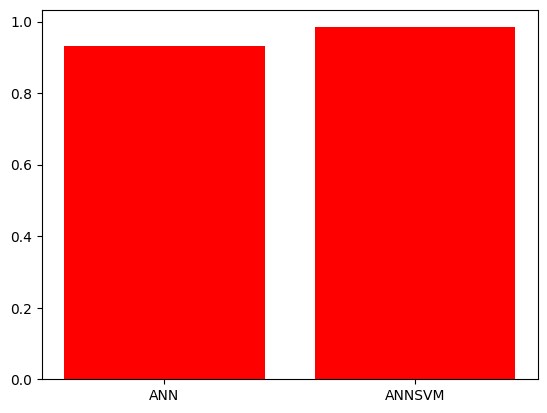

In [ ]:
from statistics import mean, stdev
import matplotlib.pyplot as plt

ANNSVM=[Svm_score]
Ann_acc=[Ann_acc]
ANNSVM_mean = mean(ANNSVM)
Ann_mean = mean(Ann_acc)
plt.bar(['ANN','ANNSVM'],[Ann_mean, ANNSVM_mean],color = 'Red')
plt.show()

### Predicted Results 

In [ ]:
y_predicted_tf =model.predict(x_test).reshape(-1)
y_predicted_tf = [1 if y>=0.5 else 0 for y in y_predicted_tf] 
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted_tf})
df.head()

7/7 [==============================] - 0s 2ms/step


,Y_test,Y_predicted
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0
590,1,1
905,0,0
737,0,0
